## Lesson 1

1. 基本音頻處理
    * 音頻讀取與寫入：學習如何讀取和寫入音頻文件（WAV、MP3等）。
    * 基本信號處理：介紹基本的信號處理概念，如取樣率、波形、振幅等。


## Src
https://www.kaggle.com/code/hantontreeonehto/first-project

https://www.kaggle.com/code/mpwolke/guitar-chords-wav

## 套件安裝

In [3]:
!pip install pydub numpy

#https://ipython.readthedocs.io/en/stable/interactive/magics.html

## 套件擷取

### Numpy

src: https://numpy.org/

In [ ]:
"""
To try the examples in the browser:
1. Type code in the input cell and press
   Shift + Enter to execute
2. Or copy paste the code, and click on
   the "Run" button in the toolbar
"""

# The standard way to import NumPy:
import numpy as np

# Create a 2-D array, set every second element in
# some rows and find max per row:

x = np.arange(15, dtype=np.int64).reshape(3, 5)
x[1:, ::2] = -99
# x
# array([[  0,   1,   2,   3,   4],
#        [-99,   6, -99,   8, -99],
#        [-99,  11, -99,  13, -99]])

x.max(axis=1)

# Generate normally distributed random numbers:
rng = np.random.default_rng()
samples = rng.normal(size=2500)
samples

![](https://cdn1.byjus.com/wp-content/uploads/2020/10/Application-Of-Matrices-3.png)

## 讀入數據庫

In [19]:
import pathlib
DATASET_PATH = '/kaggle/input/'

data_dir = pathlib.Path(DATASET_PATH)
training_dir = pathlib.Path(f'{DATASET_PATH}/Training')
test_dir = pathlib.Path(f'{DATASET_PATH}/Test')

In [21]:
import os
import numpy as np
import pandas as pd

# Load filenames
training_dir = '/kaggle/input/Training/C'
test_dir = '/kaggle/input/Test'

# List all files
train_files = []
for chord in os.listdir(training_dir):
    chord_dir = os.path.join(training_dir, chord)
    if os.path.isdir(chord_dir):
        for file_name in os.listdir(chord_dir):
            train_files.append(os.path.join(chord_dir, file_name))

# Shuffle files using numpy
np.random.seed(42)
np.random.shuffle(train_files)

# Split into train and validation
train_files_np = np.array(train_files)
train_files_split = np.split(train_files_np, [1152])
train_files, val_files = train_files_split[0], train_files_split[1]


### 畫出聲音波

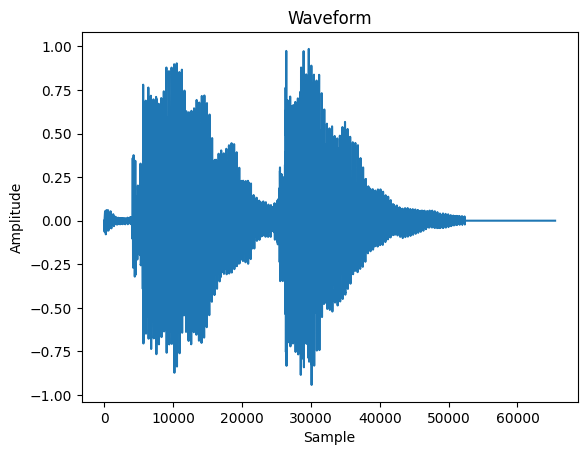

In [22]:
import librosa
import matplotlib.pyplot as plt # matplotlib.pyplot：一個用於創建各種圖表的繪圖庫。

filename = "/kaggle/input/Test/Bb/Bb_AcusticVince_JO_3.wav"
y, sr = librosa.load(filename)

plt.plot(y)
plt.title("Waveform")
plt.xlabel("Sample")
plt.ylabel("Amplitude")
plt.show()

### 生成一個正弦波音頻

In [5]:
frequency=500
duration=10
sample_rate=44100
amplitude=0.5

t = np.linspace(0, duration, int(sample_rate * duration), endpoint=False)
wave = amplitude * np.sin(2 * np.pi * frequency * t)

wave_integers = np.int16(wave * 32767) 
# 將浮點數轉換為16位整數
# 32767 是 16 位整數的最大值(2^15-1)，將浮點數乘以 32767 可以使其覆蓋整個 16 位整數範圍。
    
audio_segment = AudioSegment(
    wave_integers.tobytes(), 
    frame_rate=sample_rate,
    sample_width=wave_integers.dtype.itemsize, 
    channels=1)

# channels: 通道數，這裡為單聲道（1）

# ------------------------------------------------------------- #
# 這行使用 numpy 的 linspace 函數來生成時間軸 t。linspace 函數會在給定範圍內生成等間隔的數值：
# 0: 起始時間
# duration: 結束時間(s)
# int(sample_rate * duration): 總取樣點數，即 sample_rate 乘以 duration
# endpoint=False: 表示不包括結束時間點，這樣可以避免重複取樣

# ------------------------------------------------------------- #
# 音頻頻率 frequency：是指聲波的振動頻率，通常以赫茲（Hz）為單位表示。

## 不同的頻率對應不同的音高：
## 人耳可聽範圍：20 Hz 至 20,000 Hz（20 kHz）
## 音樂中的常見頻率範圍：
## 低音：20 Hz 至 250 Hz
## 中音：250 Hz 至 2,000 Hz
## 高音：2,000 Hz 至 20,000 Hz

## 不同樂器和聲音的頻率範圍不同。例如：
## 低音提琴：約 40 Hz 至 300 Hz
## 鋼琴：約 27 Hz 至 4,186 Hz
## 小提琴：約 196 Hz 至 4,000 Hz

In [6]:
audio_segment

## 打包

In [4]:
from pydub import AudioSegment
from pydub.playback import play

frequency=500
duration=10
sample_rate=44100
amplitude=0.5

# Step 1: 生成

def generate(frequency, duration, sample_rate, amplitude):
    t = np.linspace(0, duration, int(sample_rate * duration), endpoint=False)
    wave = amplitude * np.sin(2 * np.pi * frequency * t)

    wave_integers = np.int16(wave * 32767) 

    audio_segment = AudioSegment(
        wave_integers.tobytes(), 
        frame_rate=sample_rate,
        sample_width=wave_integers.dtype.itemsize, 
        channels=1)

    return audio_segment

audio_segment = generate(frequency=frequency, duration=duration, sample_rate=sample_rate, amplitude=amplitude)

## Session 2

## Pandas
Src: https://pandas.pydata.org/

In [ ]:
import pandas as pd

df = pd.DataFrame({
    "Name": [
        "Braund, Mr. Owen Harris",
        "Allen, Mr. William Henry",
        "Bonnell, Miss. Elizabeth",
    ],
    "Age": [22, 35, 58],
    "Sex": ["male", "male", "female"],})

df

## 載入數據集

In [23]:
from IPython.display import Audio 

Audio('/kaggle/input/Training/C/C_AcusticPlug11_1.wav', autoplay=True)

In [26]:
import os
import numpy as np
import matplotlib.pyplot as plt
import librosa

# Define the base directory for the audio files
base_dir = '/kaggle/input/Training'


import os
import numpy as np

# List all directories (which represent chords) in the training directory
chords = np.array([d for d in os.listdir(test_dir) if os.path.isdir(os.path.join(test_dir, d))])
print('Chords:', chords)



Chords: ['F' 'Em' 'Bdim' 'G' 'Bb' 'C' 'Dm' 'Am']


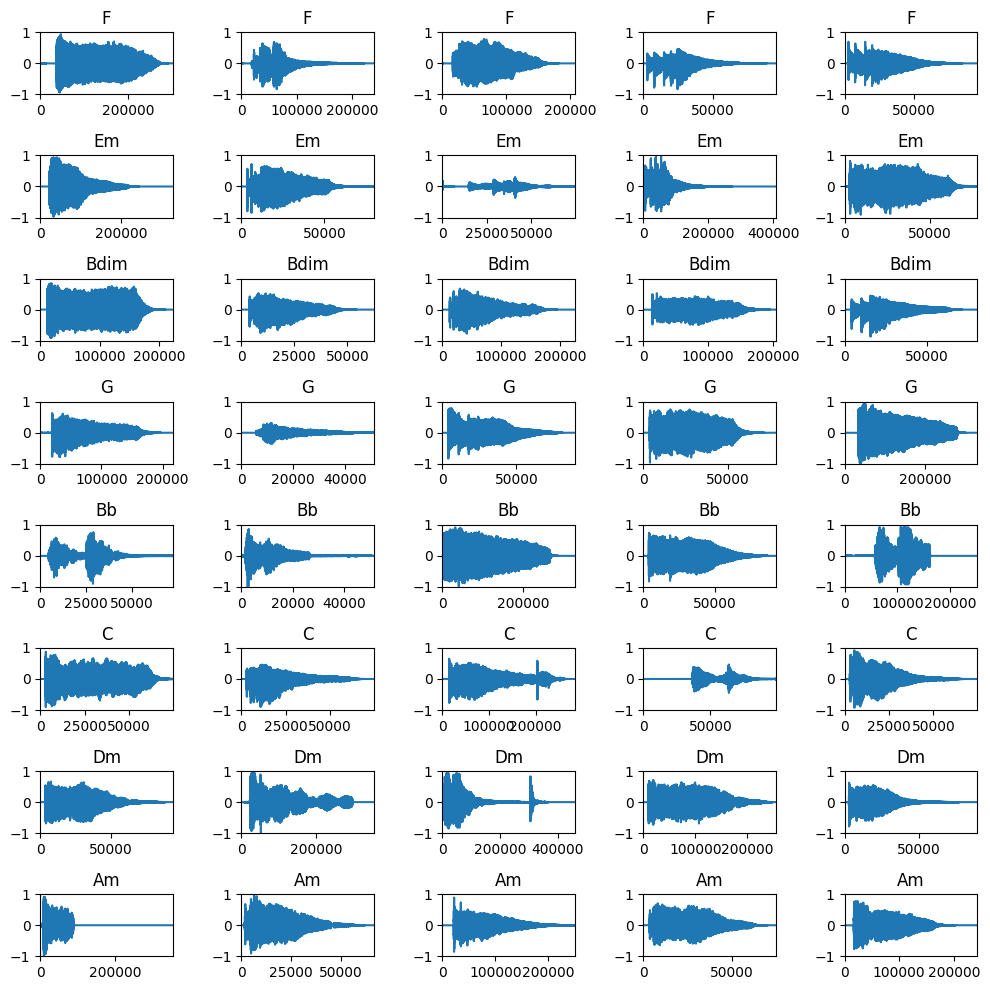

In [30]:
nums = 5 # The limit number of files per chord

# Create a grid of subplots
fig, axs = plt.subplots(len(chords), nums, figsize=(10, 10))

# Flatten the axes array for easy indexing
axs = axs.flatten()

for i, chord in enumerate(chords):
    # Get the full directory path for the chord
    chord_dir = os.path.join(base_dir, chord)
    
    # List all audio files in the directory for the chord
    audio_files = [f for f in os.listdir(chord_dir) if f.endswith('.wav')]
    
    for j, audio_file in enumerate(audio_files[:nums]):  
        file_path = os.path.join(chord_dir, audio_file)
        
        # Load the audio file
        audio, sr = librosa.load(file_path, sr=None)
        
        # Plot the waveform
        axs[i * nums + j].plot(audio)
        axs[i * nums + j].set_title(f"{chord}")
        axs[i * nums + j].set_xlim([0, len(audio)])
        axs[i * nums + j].set_ylim([-1, 1])

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()
